# SVM

> Réalisé par : Mohamed ELFILALI

## Apprentissage

Dans ce TP on va utiliser le classifieur SVM de la bibliothèque scikit-learn comme outil d’apprentissage superviser.


In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn import model_selection
from sklearn.svm import SVC
import numpy as np
from sklearn import metrics

import warnings; 
warnings.simplefilter('ignore')

mnist = datasets.fetch_mldata('MNIST original')

Tout d’abord on va couper notre jeu donné en deux parties ; la partie qui va servir pour l’apprentissage et l’autre pour l’entrainement. Pour cela on va utiliser la méthode « model_selection » avec une liste d’indice aléatoire pour bien mélanger nos données

In [2]:
data = np.random.randint(70000,size=5000)
xtrain,xtest,ytrain,ytest = model_selection.train_test_split(mnist.data[data],mnist.target[data],train_size=0.7)

Maintenant on va créer un classifieur de type SVM avec un noyau "Linear" et ensuite on va l’entrainer.

In [8]:
model = SVC(kernel='linear')

model.fit(xtrain,ytrain)

score = model.score(xtest,ytest)

print("Score :",score)

Score 0.8993333333333333


Pour bien visualiser l’impact du noyau choisit sur le classifieur on exécute le code suivant.

In [11]:
scores = []

for n in ['linear','poly','rbf','sigmoid']:
    model = SVC(kernel=n)

    model.fit(xtrain,ytrain)
    
    score = model.score(xtest,ytest)
    
    scores.append(score)
    
    print("Score avec",n,":",score)
    
model = SVC(kernel='precomputed')

kernel_train = np.dot(xtrain, xtrain.T) 

model.fit(kernel_train, ytrain)

kernel_test = np.dot(xtest, xtrain.T) 

score = model.score(kernel_test,ytest)

scores.append(score)

print("Score avec precomputed :",score)

Score avec linear : 0.8993333333333333
Score avec poly : 0.9286666666666666
Score avec rbf : 0.15333333333333332
Score avec sigmoid : 0.11533333333333333
Score avec precomputed : 0.102


On remarque que les noyaux « linear » et « poly » donnent un bon score. Le noyau Poly est le meilleur entre eux.

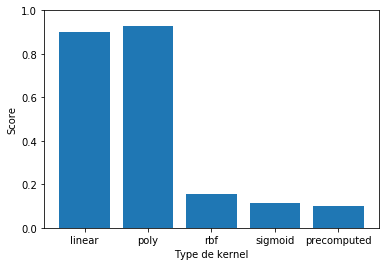

In [12]:
plt.bar(['linear','poly','rbf','sigmoid','precomputed'],scores)
plt.xlabel('Type de kernel')
plt.ylabel('Score')
plt.ylim(0, 1.0)
plt.show()

Maintenant on va faire varier le paramètre de tolérance aux erreurs et voir son impact

In [16]:
errorsC = []

for n in np.arange(0.1, 10, 2.5):
    model = SVC(C=n,kernel='poly')

    model.fit(xtrain,ytrain)
    
    ypredTest = model.predict(xtest)
    
    error = metrics.zero_one_loss(ytest, ypredTest)
    
    errorsC.append(error)
    
    print("Erreur avec c=",n,":",error)

Erreur avec c= 0.1 : 0.07133333333333336
Erreur avec c= 2.6 : 0.07133333333333336
Erreur avec c= 5.1 : 0.07133333333333336
Erreur avec c= 7.6 : 0.07133333333333336


D’après le graphe du résultat on constat que ce paramètre n’influence pas sur l’erreur du classifieur.

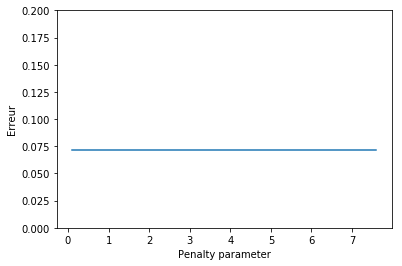

In [17]:
plt.plot(np.arange(0.1, 10, 2.5),errorsC)
plt.xlabel('Penalty parameter')
plt.ylabel('Erreur')
plt.ylim(0, 0.2)
plt.show()

On fait la même chose pour le paramètre gamma et on constate qu’il n’a pas un impact sur l’apprentissage.

In [18]:
scoresGama = []

for n in np.arange(0.1, 12.5, 2.5):
    model = SVC(gamma=n,kernel='poly')

    model.fit(xtrain,ytrain)
    
    score = model.score(xtest,ytest)
    
    scoresGama.append(score)
    
    print("Score avec gamma=",n,":",score)

Score avec gamma= 0.1 : 0.9286666666666666
Score avec gamma= 2.6 : 0.9286666666666666
Score avec gamma= 5.1 : 0.9286666666666666
Score avec gamma= 7.6 : 0.9286666666666666
Score avec gamma= 10.1 : 0.9286666666666666


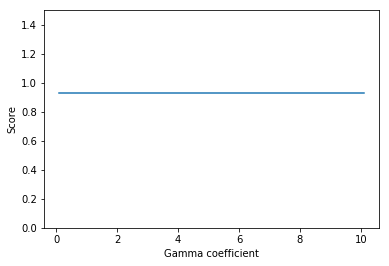

In [19]:
plt.plot(np.arange(0.1, 12.5, 2.5),scoresGama)
plt.xlabel('Gamma coefficient')
plt.ylabel('Score')
plt.ylim(0, 1.5)
plt.show()

A ce point-là on a testé les différents paramètres du classifieur et comparé les résultats obtenus, maintenant à l’aide de la fonction GridSearchCV on va essayer de trouver les meilleures options.

In [3]:
parameters = {'kernel':('linear','poly','rbf','sigmoid'), 'C':[1, 10],'gamma':[1,10]}
model = SVC()
clf = model_selection.GridSearchCV(model, parameters)

clf.fit(xtrain,ytrain)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 'C': [1, 10], 'gamma': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

On affiche maintenant les meilleurs paramètres.

In [4]:
clf.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Pour avoir une meilleure vision sur l’ensemble des prédictions on affiche la matrice de confusion. Le résultat idéal est d’avoir une matrice diagonale 

In [5]:
ypredTest = clf.predict(xtest)
cm = metrics.confusion_matrix(ytest,ypredTest)

In [6]:
print(cm)

[[144   1   0   1   0   0   2   1   0   0]
 [  0 163   0   0   0   0   0   0   1   0]
 [  1   6 151   0   0   0   2   2   1   1]
 [  2   1   3 144   0   1   0   0   3   1]
 [  0   3   1   0 140   0   0   0   1   0]
 [  1   2   0   3   1 123   1   0   0   4]
 [  0   2   0   0   0   2 153   0   0   0]
 [  1   1   2   2   0   0   0 134   1   4]
 [  0   3   2   4   0   0   1   0 125   1]
 [  0   4   1   1   0   0   0   2   0 142]]


# Conclusion

**SVM** a ses avantages et ses inconvénients:

### Avantages: 
- Cette méthode permets d'un taux d'erreur stable. 
- Elle nécessite pas le temps de calcul important (les séparateurs sont hyperplans).
- Elle est efficace lors de la mise en production.
- **SVM** fonctionne correctement même pour les jeux de données ayant une grande dimension (beaucoup de caractéristiques - features), tandis que le nombre d'observation reste limité.

### Inconvénients:
- **SVM** demande une connaissance profonde en statistique, des connaissances métiers afin de pouvoir choisir la fonction de noyau (kernel) adapté à la forme des données.
- Cette méthode a difficulté lors qu'on a un grand nombre d'observation: Elle a besoin le mémoire en cache pour résoudre le problème d'optimisation.
- Elle ne donne pas l'indice sur la pertinence des features.